In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

## Dataset

In [12]:
mnist=fetch_mldata('MNIST original')
X=mnist['data']
y=mnist['target']
X_train=np.array(X[:60000],dtype='float')
y_train=np.array(y[:60000],dtype='float')
X_test=np.array(X[60000:],dtype='float')
y_test=np.array(y[60000:],dtype='float')

## PCA

In [4]:
class PCA():
    def __init__(self,n_components):
        self.n_components=n_components
        self.components_=None
    def fit(self,X,lr=0.01,n_iters=1e4):
        def demean(X):
            return X-np.mean(X,axis=0)
        def direction(w):
            return w/ np.linalg.norm(w)
        def df(w,X):
            return X.T.dot(X.dot(w)) *2/len(X)
        def ga(X,initial_w,lr,n_iters):
            w=direction(initial_w)
            for _ in range(int(n_iters)):
                gradient=df(w,X)
                w=w+lr*gradient
                w=direction(w)
            return w
        X_demean=demean(X)
        self.components_=np.empty((self.n_components,X.shape[1]))
        for i in range(self.n_components):
            initial_w=np.random.random(X.shape[1])
            w=ga(X_demean,initial_w,lr,n_iters)
            self.components_[i]=w
            X_demean=X_demean - X_demean.dot(w).reshape(-1,1)*w
        return self
    def transform(self,X):
        return X.dot(self.components_.T)
    def __repr__(self):
        return 'tomoya'

## eva

In [13]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [14]:
pca=PCA(0.9)
pca.fit(X_train)
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)
knn_clf.score(X_test_reduction,y_test)

0.9728

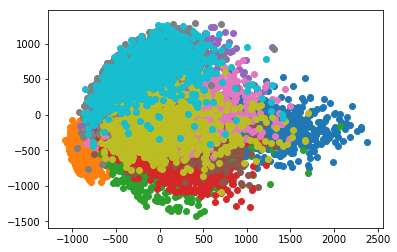

In [17]:
pca=PCA(2)
pca.fit(X)
X_reduction=pca.transform(X[60000:])
for i in range(10):
    plt.scatter(X_reduction[y[60000:]==i,0],X_reduction[y[60000:]==i,1])